## 1. Load Data

Load `/data/features_3_sec.csv` and `/data/features_30_sec.csv` using pandas.

In [ ]:
%pip install scikit-learn pandas numpy librosa tqdm

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the datasets
# Assuming the notebook is in the 'src' directory, the data is in '../data/'
df_3_sec = pd.read_csv('../data/features_3_sec.csv')
df_30_sec = pd.read_csv('../data/features_30_sec.csv')

## 2. Exploratory Data Analysis (EDA)

We will perform EDA on the 3-second features dataset (`df_3_sec`). Similar steps can be applied to the 30-second dataset.

### Display the first few rows of the data.

In [2]:
print("3-Second Features Dataset Head:")
df_3_sec.head()

3-Second Features Dataset Head:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [12]:
print("30-Second Features Dataset Head:")
df_30_sec.head()

30-Second Features Dataset Head:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Check for missing values and data types.

In [11]:
print("Data Info:")
df_3_sec.info()

print("\nMissing Values:")
df_3_sec.isnull().sum()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean 

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [13]:
print("Data Info:")
df_30_sec.info()

print("\nMissing Values:")
df_30_sec.isnull().sum()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean  

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

### Identify and remove any erroneous or outlier values.

In [ ]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df_3_sec.duplicated().sum()}")

# Remove duplicate rows
df_3_sec.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df_3_sec.duplicated().sum()}")

# There are no obvious columns where negative values would be erroneous, 
# as features like chroma_stft can have negative values.
# Outlier detection can be more complex and domain-specific, so we'll skip advanced outlier removal for now.

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [14]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df_30_sec.duplicated().sum()}")

# Remove duplicate rows
df_30_sec.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df_30_sec.duplicated().sum()}")

# There are no obvious columns where negative values would be erroneous, 
# as features like chroma_stft can have negative values.
# Outlier detection can be more complex and domain-specific, so we'll skip advanced outlier removal for now.

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


### Summarize basic statistics.

In [5]:
df_3_sec.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [15]:
df_30_sec.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


## 3. Feature Processing

### Split the data into features (X) and target (y).

In [16]:
# Features (X) are all columns except 'filename', 'length', and 'label'
X = df_3_sec.drop(['filename', 'length', 'label'], axis=1)

# Target (y) is the 'label' column
y = df_3_sec['label']

### Normalize or standardize the features.

In [17]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# X_scaled is now a numpy array. We can convert it back to a DataFrame for inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-0.487808,0.640520,-0.006624,0.235568,-0.566828,-0.572791,-0.493983,-0.009229,-0.518590,-0.367952,...,-0.750122,-0.299108,0.168647,-0.425137,-0.003423,-0.376938,-0.499464,-0.513562,0.128414,-0.291781
1,-0.403142,0.131835,-0.264944,-0.342134,-0.508798,-0.749862,-0.425382,-0.519010,-0.424118,-0.642268,...,0.457983,0.428544,-0.327031,-0.310040,-0.112125,-0.032083,-0.066593,1.011384,1.275780,0.056425
2,-0.361694,0.764491,0.016695,0.542195,-0.546245,-0.701852,-0.288365,-0.425734,-0.346190,-0.562723,...,0.585548,0.503695,0.428053,-0.648762,0.316311,-0.177372,0.109337,-0.046244,0.653907,-0.521458
3,-0.175714,0.205477,0.024885,-0.063820,-0.723482,-0.700599,-0.517344,-0.348881,-0.607665,-0.474804,...,-0.489524,-0.065309,0.062981,-0.649076,0.092384,-0.464121,-0.211882,-0.099501,0.865880,-0.544744
4,-0.485895,0.337521,0.181345,-0.272072,-0.756246,-0.774827,-0.538557,-0.572962,-0.667537,-0.683920,...,0.112417,-0.570609,0.856651,-0.167089,0.183265,-0.029476,-0.175130,-0.678995,0.276899,-0.606692


### Split into train/test sets.

In [18]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (7992, 57)
Shape of X_test: (1998, 57)
Shape of y_train: (7992,)
Shape of y_test: (1998,)


## 4. Model Implementation

In [20]:
%pip install scikit-learn pandas numpy librosa tqdm xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 7.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 7.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Logistic Regression

In [22]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Results:
Accuracy: 0.7187187187187187

Classification Report:
              precision    recall  f1-score   support

       blues       0.67      0.70      0.69       200
   classical       0.91      0.95      0.93       199
     country       0.64      0.59      0.62       199
       disco       0.64      0.66      0.65       200
      hiphop       0.75      0.60      0.67       200
        jazz       0.78      0.84      0.81       200
       metal       0.81      0.85      0.83       200
         pop       0.79      0.77      0.78       200
      reggae       0.66      0.70      0.68       200
        rock       0.53      0.52      0.52       200

    accuracy                           0.72      1998
   macro avg       0.72      0.72      0.72      1998
weighted avg       0.72      0.72      0.72      1998



### Learning Curve for Logistic Regression

/home/areen/miniconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/areen/miniconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/areen/miniconda3/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/areen/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py"

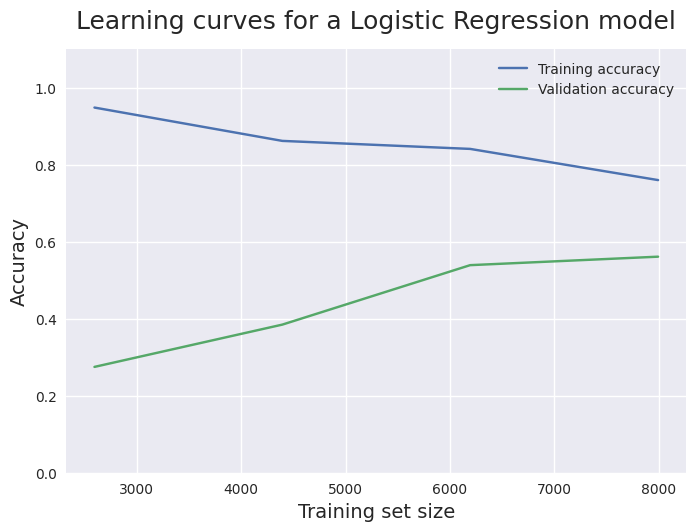

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=LogisticRegression(max_iter=1000),
    X=X_scaled,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.style.use('seaborn-v0_8')
plt.plot(train_sizes, train_scores_mean, label='Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label='Validation accuracy')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a Logistic Regression model', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

### K-fold Cross-Validation for Logistic Regression

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(max_iter=1000), X_scaled, y, cv=5, scoring='accuracy')
print(f"Mean accuracy: {scores.mean():.2f}")
print(f"Standard deviation: {scores.std():.2f}")

Mean accuracy: 0.56
Standard deviation: 0.05


### Hyperparameter Tuning for Logistic Regression

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'C': 10}
Best cross-validation score: 0.57


### Random Forest Classifier

In [26]:
# Initialize and train the Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Results:
Accuracy: 0.8633633633633634

Classification Report:
              precision    recall  f1-score   support

       blues       0.82      0.83      0.83       200
   classical       0.91      0.96      0.93       199
     country       0.78      0.80      0.79       199
       disco       0.83      0.84      0.84       200
      hiphop       0.92      0.88      0.90       200
        jazz       0.86      0.90      0.88       200
       metal       0.86      0.96      0.91       200
         pop       0.95      0.82      0.88       200
      reggae       0.82      0.88      0.85       200
        rock       0.90      0.75      0.82       200

    accuracy                           0.86      1998
   macro avg       0.87      0.86      0.86      1998
weighted avg       0.87      0.86      0.86      1998



### Learning Curve for Random Forest

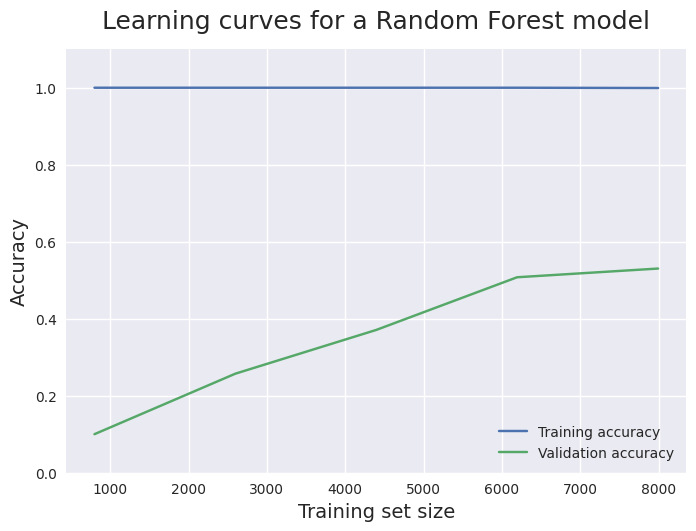

In [27]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    X=X_scaled,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.style.use('seaborn-v0_8')
plt.plot(train_sizes, train_scores_mean, label='Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label='Validation accuracy')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a Random Forest model', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

### K-fold Cross-Validation for Random Forest

In [28]:
scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_scaled, y, cv=5, scoring='accuracy')
print(f"Mean accuracy: {scores.mean():.2f}")
print(f"Standard deviation: {scores.std():.2f}")

Mean accuracy: 0.53
Standard deviation: 0.06


### Hyperparameter Tuning for Random Forest

In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 300}
Best cross-validation score: 0.54


### Support Vector Machine (SVM)

In [30]:
# Initialize and train the SVM model
svm_clf = SVC(kernel='rbf', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Results:
Accuracy: 0.8453453453453453

Classification Report:
              precision    recall  f1-score   support

       blues       0.83      0.85      0.84       200
   classical       0.86      0.96      0.91       199
     country       0.83      0.81      0.82       199
       disco       0.77      0.81      0.79       200
      hiphop       0.90      0.81      0.86       200
        jazz       0.85      0.88      0.87       200
       metal       0.92      0.92      0.92       200
         pop       0.90      0.82      0.86       200
      reggae       0.82      0.86      0.84       200
        rock       0.77      0.73      0.75       200

    accuracy                           0.85      1998
   macro avg       0.85      0.85      0.84      1998
weighted avg       0.85      0.85      0.84      1998



### Learning Curve for SVM

/home/areen/miniconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/areen/miniconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/areen/miniconda3/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/areen/miniconda3/lib/python3.13/site-packages/sklearn/svm/_base.py", line 207, i

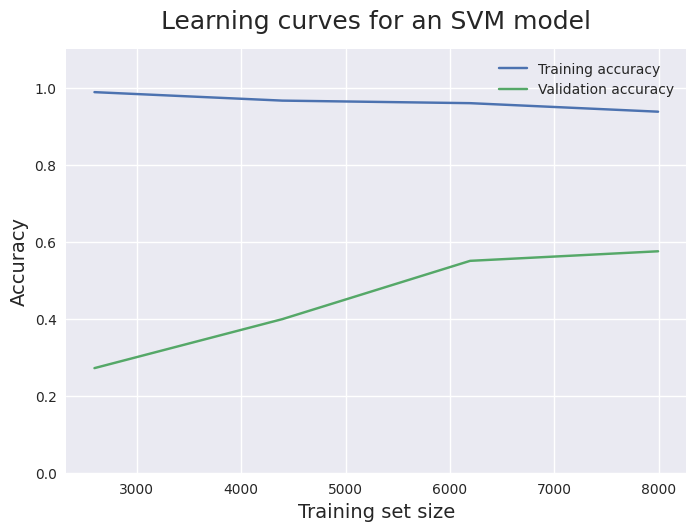

In [31]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=SVC(kernel='rbf', C=1.0, random_state=42),
    X=X_scaled,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.style.use('seaborn-v0_8')
plt.plot(train_sizes, train_scores_mean, label='Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label='Validation accuracy')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for an SVM model', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

### K-fold Cross-Validation for SVM

In [32]:
scores = cross_val_score(SVC(kernel='rbf', C=1.0, random_state=42), X_scaled, y, cv=5, scoring='accuracy')
print(f"Mean accuracy: {scores.mean():.2f}")
print(f"Standard deviation: {scores.std():.2f}")

Mean accuracy: 0.58
Standard deviation: 0.06


### Hyperparameter Tuning for SVM

In [33]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.58


### XGBoost Classifier

In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the XGBoost Classifier model
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train_encoded)

# Predict on the test data
y_pred_xgb_encoded = xgb_clf.predict(X_test)

# Decode the predictions back to original labels for evaluation
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluate the model
print("XGBoost Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_xgb_encoded)}") # Evaluate using encoded labels
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_xgb_encoded, target_names=label_encoder.classes_)) # Use target_names for clarity

XGBoost Classifier Results:
Accuracy: 0.8998998998998999

Classification Report:
              precision    recall  f1-score   support

       blues       0.89      0.90      0.89       200
   classical       0.92      0.96      0.94       199
     country       0.84      0.87      0.86       199
       disco       0.88      0.91      0.90       200
      hiphop       0.92      0.91      0.91       200
        jazz       0.89      0.90      0.90       200
       metal       0.95      0.94      0.94       200
         pop       0.95      0.86      0.91       200
      reggae       0.88      0.90      0.89       200
        rock       0.89      0.83      0.86       200

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998



### Learning Curve for XGBoost

/home/areen/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:26:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/areen/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:26:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/areen/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:26:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/areen/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:26:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/areen/miniconda3/lib/python3.13/site-packages/

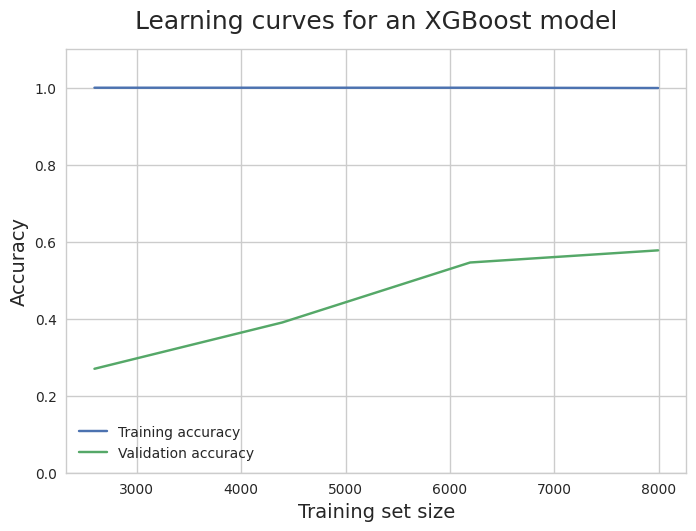

In [39]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    X=X_scaled,
    y=y_encoded,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(train_sizes, train_scores_mean, label='Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label='Validation accuracy')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for an XGBoost model', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    X=X_scaled,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.style.use('seaborn-v0_8')
plt.plot(train_sizes, train_scores_mean, label='Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label='Validation accuracy')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for an XGBoost model', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

SyntaxError: invalid syntax (4105302531.py, line 1)

### K-fold Cross-Validation for XGBoost

In [40]:
scores = cross_val_score(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), X_scaled, y, cv=5, scoring='accuracy')
print(f"Mean accuracy: {scores.mean():.2f}")
print(f"Standard deviation: {scores.std():.2f}")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/areen/miniconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/areen/miniconda3/lib/python3.13/site-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/home/areen/miniconda3/lib/python3.13/site-packages/xgboost/sklearn.py", line 1641, in fit
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8 9], got ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


### Hyperparameter Tuning for XGBoost

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")